<a href="https://colab.research.google.com/github/khanhduy309/Airline-passenger-satisfaction/blob/main/Airline_passenger_satisfaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #2b6777; color:#ffffff;text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Airline passenger satisfaction
</h1></div>

<center><a><img src="https://apartmentinteriors.ru/wp-content/uploads/samolot-charter-private-jet-charter-02.jpg" border="3" width=800 height=600 class="center"></a>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Task description</h1></div>

**There is the following information about the passengers of some airline:**

1. **Gender:** male or female
2. **Customer type:** regular or non-regular airline customer
3. **Age:** the actual age of the passenger
4. **Type of travel:** the purpose of the passenger's flight (personal or business travel)
5. **Class:** business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service:** satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient:** departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking:** online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location:** level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink:** food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding:** satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort:** seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment:** satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service:** level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling:** level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service:** level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service:** level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness:** level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**

This data set contains a survey on <b>air passenger satisfaction</b>. The following <b>classification problem</b> is set:

It is necessary to predict which of the <b>two</b> levels of satisfaction with the airline the passenger belongs to:
<ol>
    <li><em>Satisfaction</em></li>
    <li><em>Neutral or dissatisfied</em></li>
</ol>

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Reading data</h1></div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification



In [ ]:
data = pd.read_csv("/content/sample_data/train.csv")

Table dimensions:

In [ ]:
data.shape

(103904, 25)

Each row corresponds to one passenger, and each column to a specific feature.<br>
Let's look at the first and last rows of the data set:

In [ ]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


Let's take a closer look at the dataset data:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

You may notice the following:
<ol>
     <li><b>The column</b> corresponding to the <b>Arrival Delay in Minutes feature has 310 missing values</b>.</li>
     <li><b>The first two features are useless and will not affect the classification</b>, so you should get rid of them.</li>
     <li><b>Many columns contain categorical values</b> but are of type 'object' or 'int64'. Let's replace this type with a special one designed for storing categorical values.</li>
</ol>

In [ ]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [ ]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
data.iloc[:,categorical_indexes] = data.iloc[:,categorical_indexes].astype('category')

Now the dataset information looks like this:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

The first 22 features have been detailed above. The <b>satisfaction</b> feature is the target.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Data visualization and calculation of the main characteristics</h1></div>

Get summary information about quantitative features by calling the "describe" method with default parameters:

In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


For each quantitative attribute, mean values, standard deviation, minimum and maximum values, median and quartile values are given.

Now we get information about categorical features:

In [ ]:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


For each categorical feature, the total number of values, the number of unique values, the most frequently occurring element and the total number of such elements are given.

Let's look at the ratio of the values of the target variable:

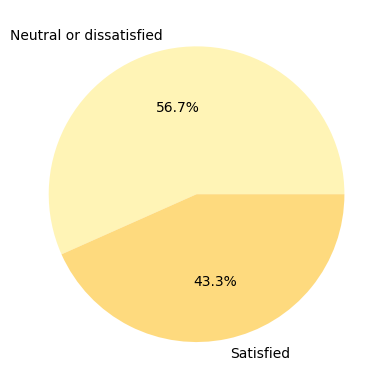

In [ ]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

As you can see from the pie chart, <b>the selection is more or less balanced</b>.

Let's calculate the correlation matrix for quantitative features and use the visual image of this matrix:

In [ ]:
corr_mat = data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


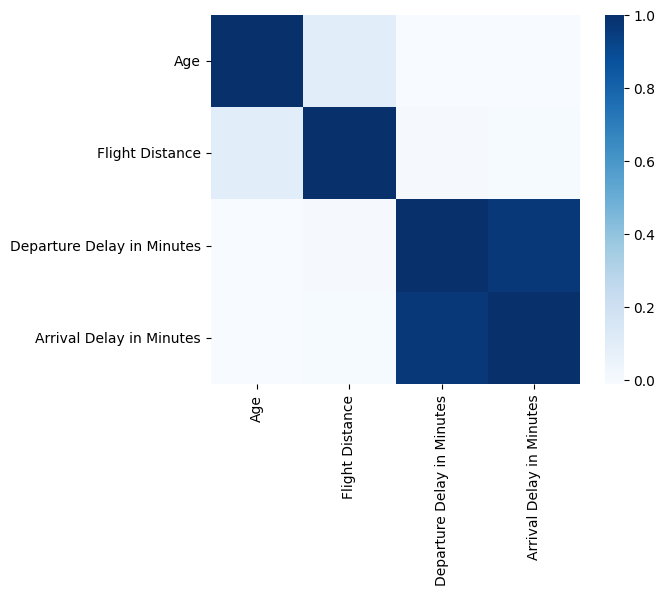

In [ ]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

You can see that there is a strong correlation between the features <em>'Departure delay in minutes'</em> and <em>'Arrival delay in minutes'</em>. The value of the correlation coefficient reaches the following value:

In [ ]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.965481
dtype: float64

Let's build a scatterplot for these features:

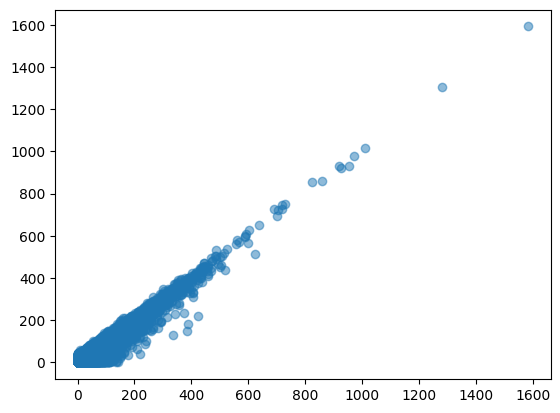

In [ ]:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)
pass

You can see that the points lined up more or less along a straight line going from the lower left corner to the upper right. Thus, in some approximation <b>the dependence of the arrival time delay on the departure time delay is linear</b>.

The results obtained are quite logical and can be explained as follows. If the flight of the airline's customers was delayed by a certain amount of time at departure, then the flight will be delayed by about the same amount of time at landing (provided that the aircraft does not accelerate in flight to make up for lost time).

Consider the ratio of values for each of the categorical features:

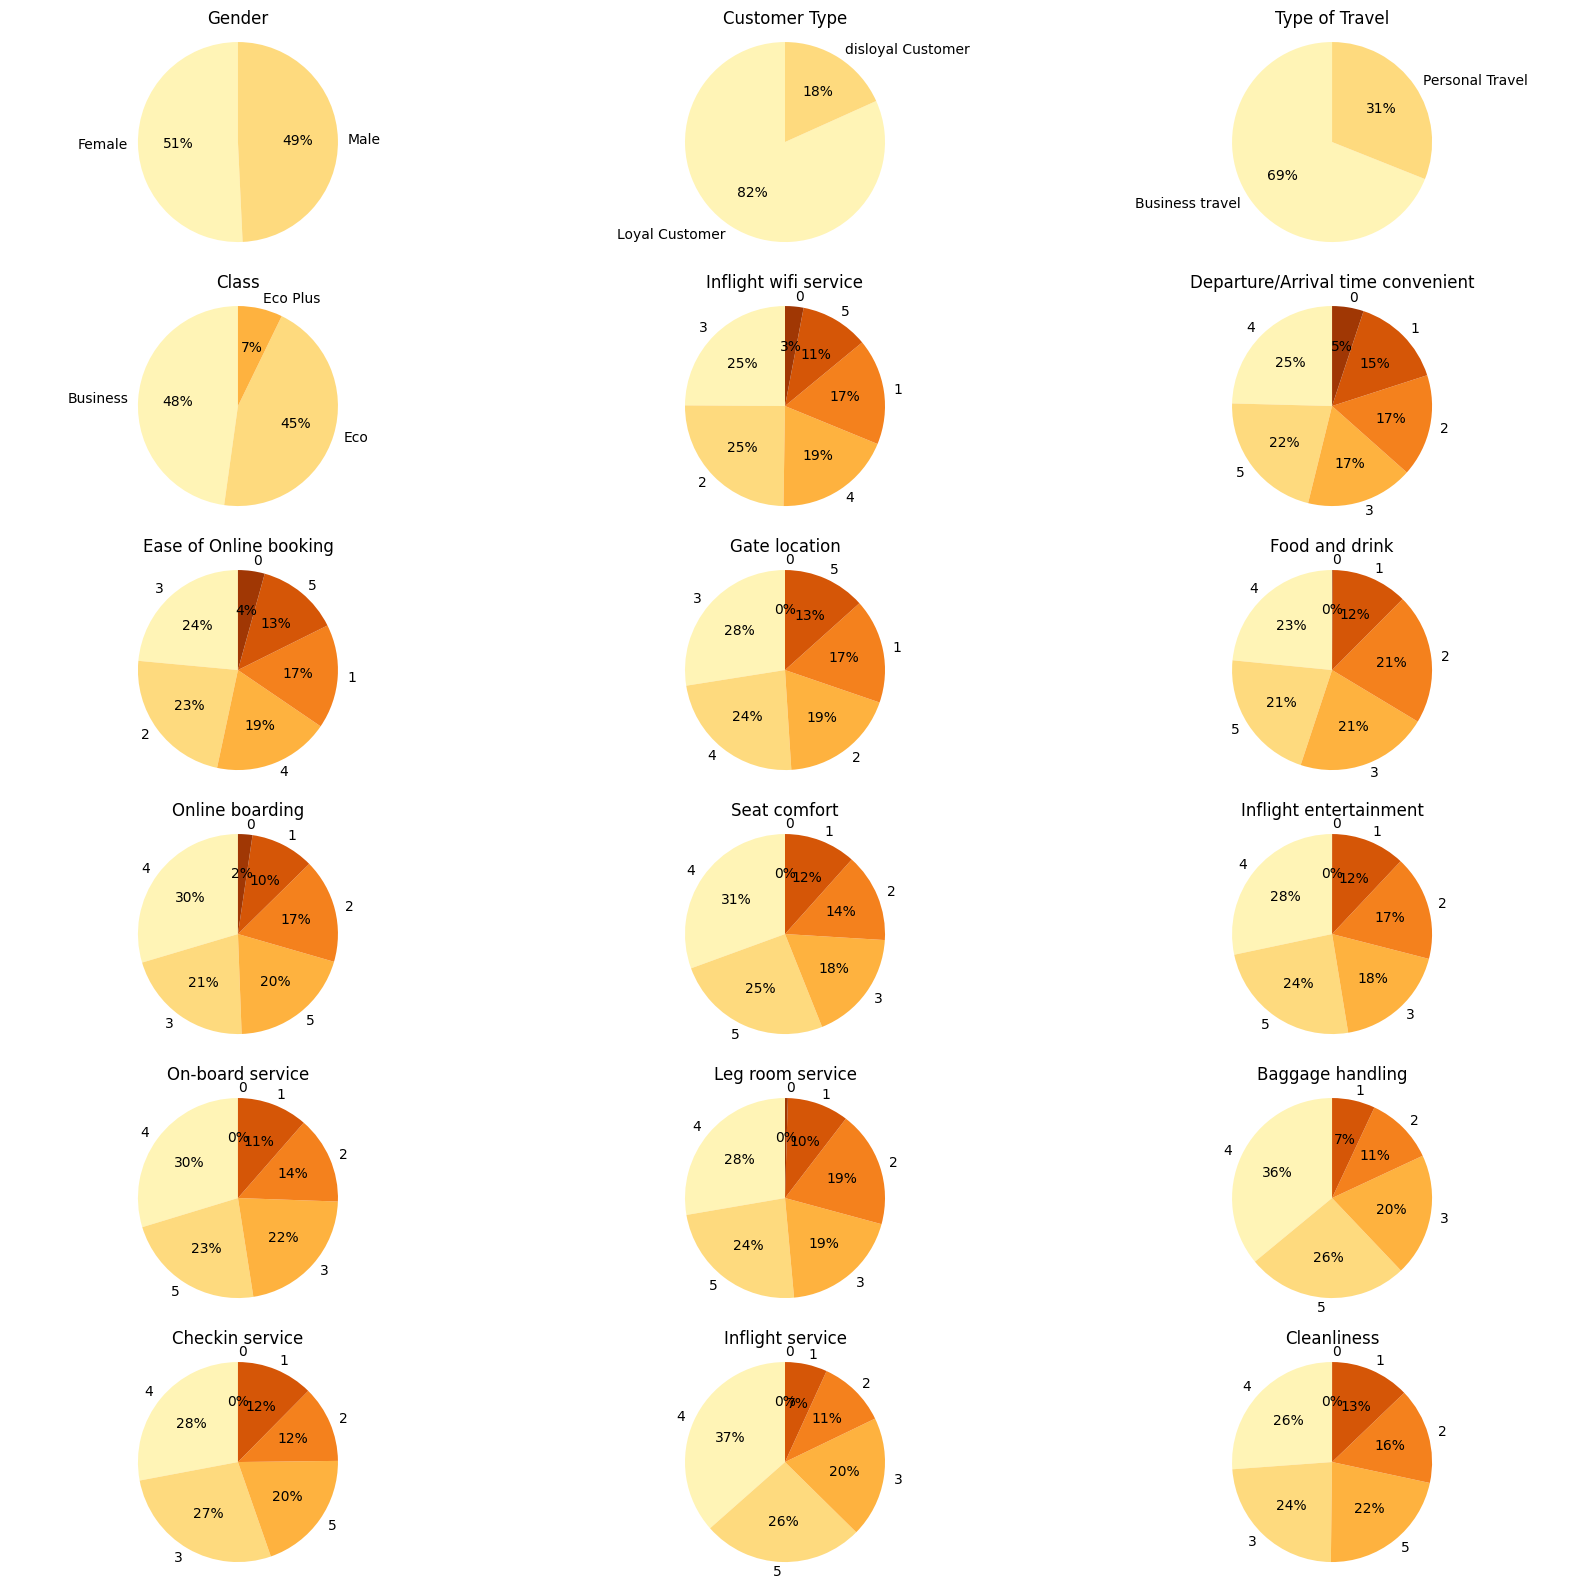

In [ ]:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Some conclusions about the considered sample:
<ul>
    <li>The number of men and women in this sample is approximately the same</li>
    <li>The vast majority of the airline's customers are repeat customers</li>
    <li>Most of our clients flew for business rather than personal reasons</li>
    <li>About half of the passengers were in business class</li>
    <li>More than 60% of passengers were satisfied with the luggage transportation service (rated 4-5 out of 5)</li>
    <li>More than 50% of passengers were comfortable sitting in their seats (rated 4-5 out of 5)</li>
</ul>

Now let's look at a few "boxes with whiskers" (box diagrams).

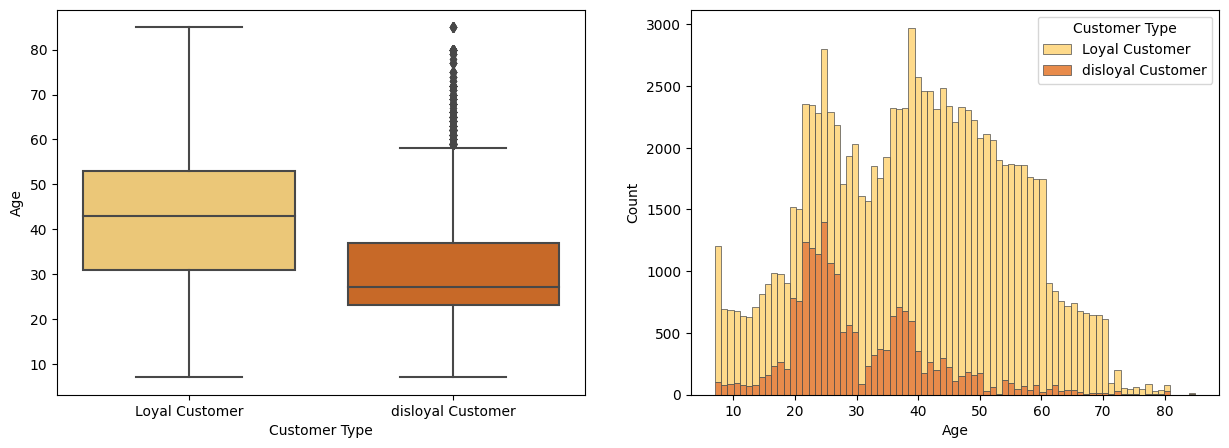

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

From this box diagram, we can conclude that <b>most of the airline's regular customers are between the ages of 30 and 50 (their average age is slightly over 40)</b>. The age range of non-regular customers is slightly smaller (from 25 to 40 years old, on average - a little less than 30).

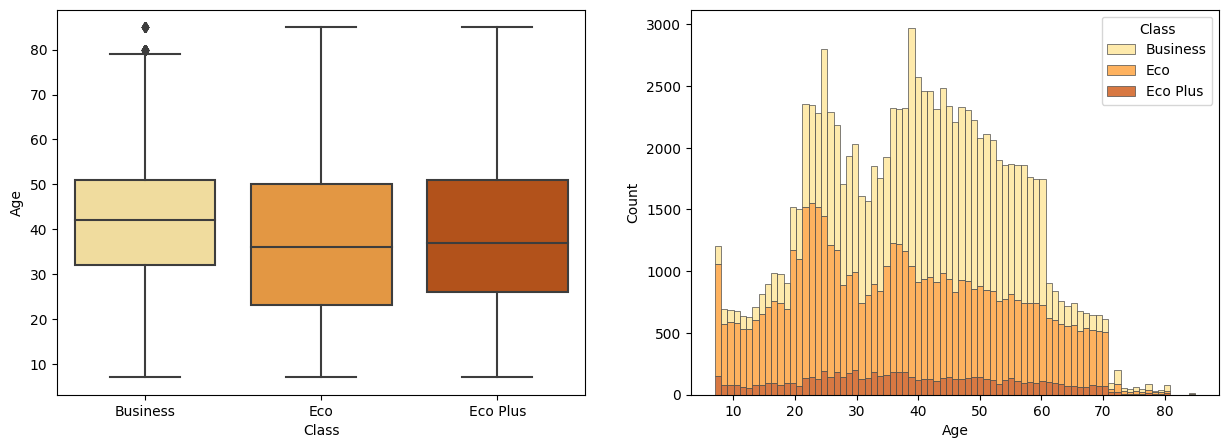

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

It can be seen that, on average, the age range of those customers who travel in business class is the same (according to the previous box chart) as the age range of regular customers. Based on this observation, it can be assumed that <b>regular customers mainly buy business class for themselves</b>.

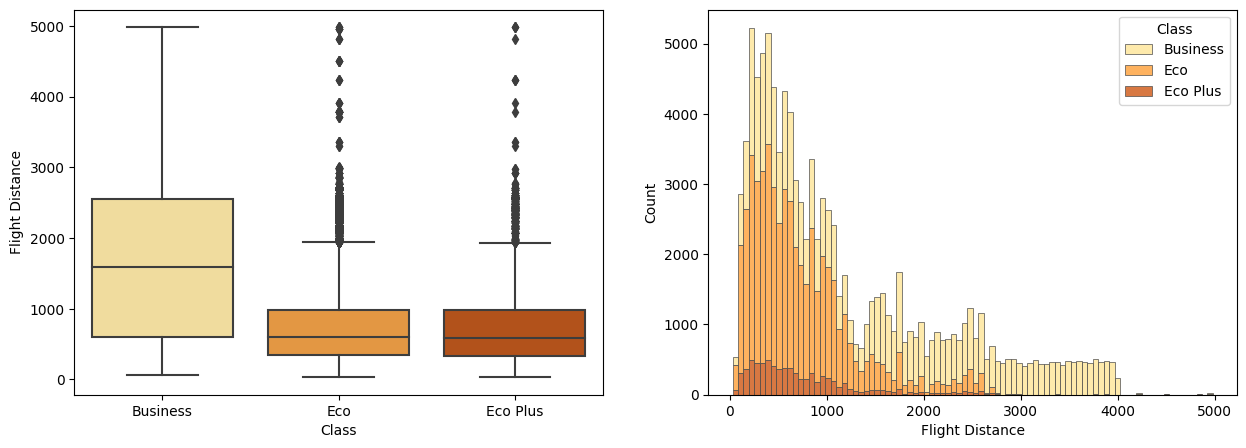

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

From this box diagram, the following conclusion can be drawn: <b>customers whose flight distance is long, mostly fly in business class</b>.

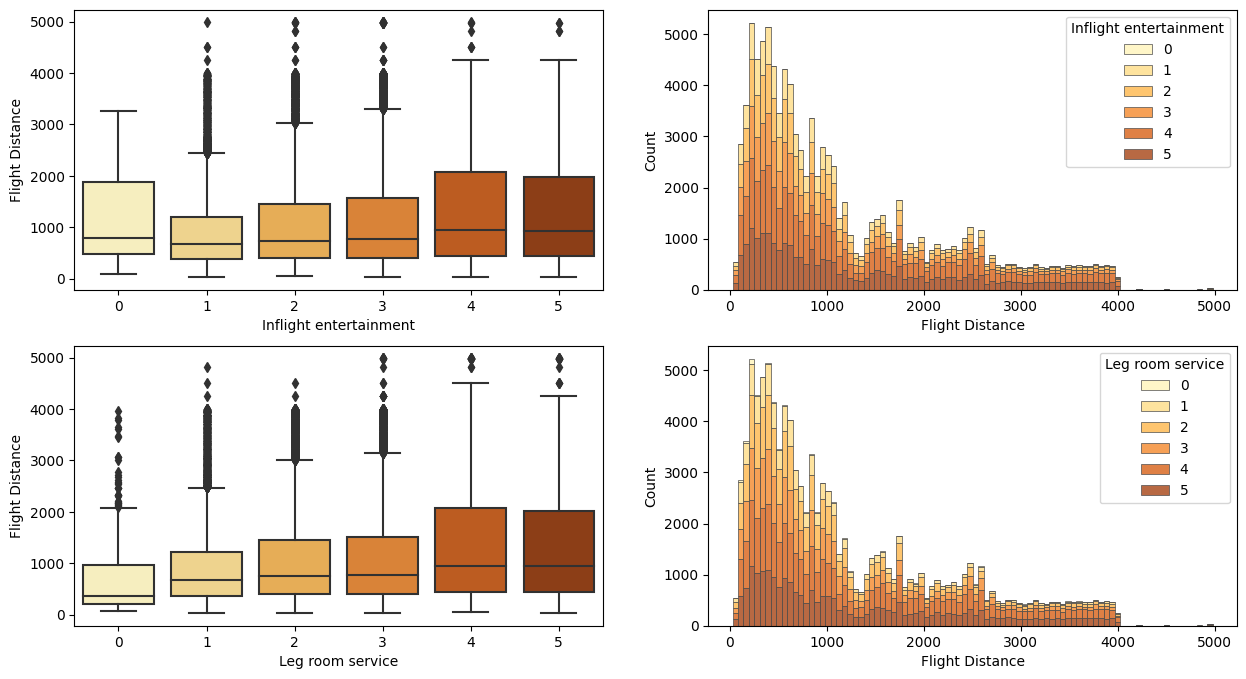

In [ ]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

The following pattern can be seen: <b>the more distance an aircraft passenger travels (respectively, the longer they are in flight), the more they are satisfied with the entertainment in flight and the extra legroom (on average)</b>.

Now consider the dependence graphs of some categorical features on the target - <em>satisfaction of air passengers</em>:

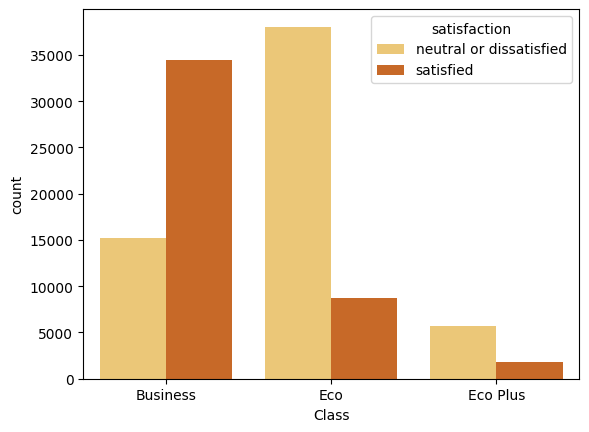

In [ ]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

This chart is very revealing. You can see that <b>most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied</b>.

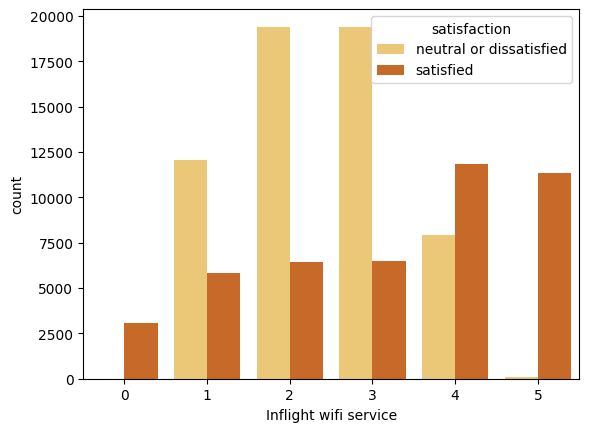

In [ ]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

According to this graph, you can see that <b>almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight</b>.

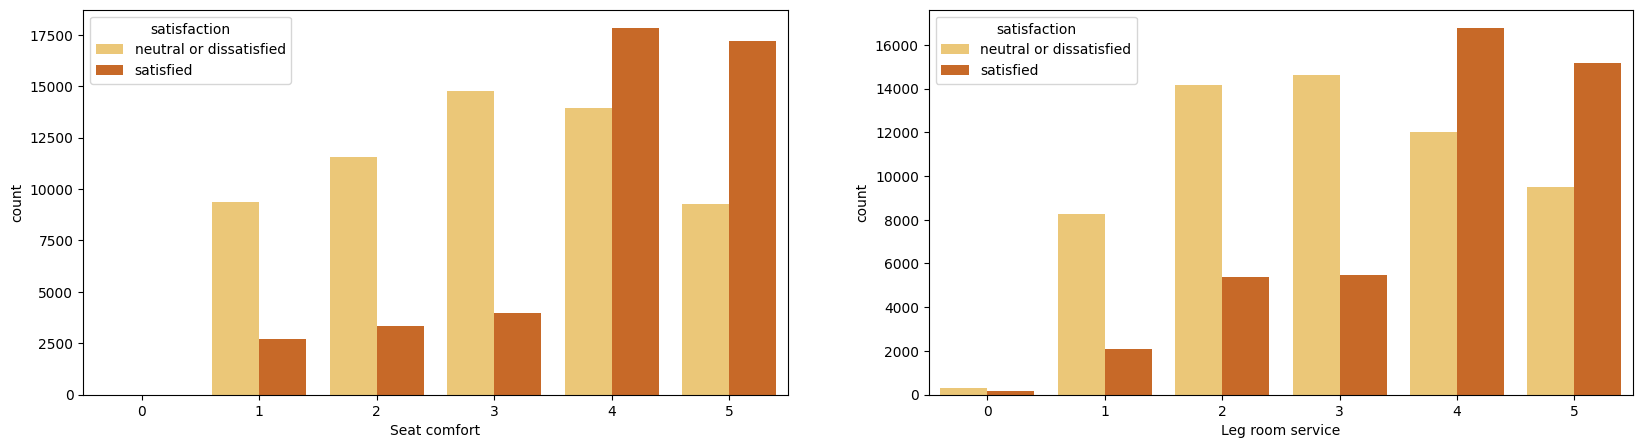

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()


From the graphs above, we can conclude the following: <b>most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight</b>.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Filling in missing values</h1></div>

Let's see how many missing values are in each column of the table:

In [ ]:
data.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Fill in the missing values with <b>medians</b> in the columns corresponding to quantitative features:

In [ ]:
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

In [ ]:
data.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


This table shows that there are no more missing values.

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Handling categorical features</h1></div>

We divide the signs into quantitative and categorical:

In [ ]:
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
data_describe = data.describe(include = ['category'])

We divide categorical features into binary and non-binary:

In [ ]:
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


Let's look at the unique values for each binary feature:

In [ ]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in data[col].unique():
        if uniq == data[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : Loyal Customer, disloyal Customer.
Type of Travel : Personal Travel, Business travel.


Let's do the binarization:

In [ ]:
data[col] == uniq

0         False
1          True
2          True
3          True
4          True
          ...  
103899     True
103900     True
103901     True
103902     True
103903     True
Name: Type of Travel, Length: 103904, dtype: bool

In [ ]:
for col in binary_columns:
    data[col] = data[col].astype('object')
    k = 0
    for uniq in data[col].unique():
        data.loc[data[col] == uniq, col] = k
        k +=1
for col in binary_columns:
    print(data[col].describe(), end = '\n\n')

count     103904
unique         2
top            1
freq       52727
Name: Gender, dtype: int64

count     103904
unique         2
top            0
freq       84923
Name: Customer Type, dtype: int64

count     103904
unique         2
top            1
freq       71655
Name: Type of Travel, dtype: int64



Now let's look at non-binary categorical features:

In [ ]:
data[nonbinary_columns]

,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Eco,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,Business,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,Business,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,Eco,1,1,1,5,1,1,1,1,4,5,1,5,4,1


The following vectorization method is applicable to non-binary features:

The feature j, which takes s values, will be replaced by s features, which take the values 0 or 1, depending on what the value of the original feature j is.

This vectorization is carried out by the get_dummies method:

In [ ]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

In [ ]:
len(data_nonbinary.columns)

86

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Normalization of quantitative features</h1></div>

We have the following quantitative characteristics:

In [ ]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


Let's perform a <b>standardization</b> (<em>linear transformation that reduces all values to zero mean and one standard deviation</em>) of all quantitative features:

In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [ ]:
data_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Table formation</h1></div>

We join all the transformed columns into one table:

In [ ]:
target = data['satisfaction']
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)

(103904, 93)


Now it looks like this:

In [ ]:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.549034e-17,8.000991e-17,1.853221e-17,1.463429e-17,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142229e+00,-1.161763e+00,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190365e-01,-7.776668e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103839e-02,-3.474395e-01,-3.875299e-01,-3.915519e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687940e-01,5.551353e-01,-7.364771e-02,-5.519805e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018221e+00,3.804405e+00,4.125418e+01,4.059187e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Splitting the data on training and test sets</h1></div>

Get <b>X</b> and <b>y</b>:

In [ ]:
X = data
y = target
N, d = X.shape
N, d

(103904, 93)

In [ ]:
X.columns

Index(['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and 

In [ ]:
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103904, dtype: object

Let's split the data into training and test samples in a ratio of 9:1 <b>(90% - training sample, 10% - test)</b>:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 777)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(93513, 10391)

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>K-nearest neighbors (kNN) method</h1></div>

Let's train and run kNN for the 10 number of neighbors:

In [ ]:
knn = KNeighborsClassifier()

knn.set_params(n_neighbors = 10)
knn.fit(X_train.values, y_train.values)
err_train = np.mean(y_train.values != knn.predict(X_train.values))
err_test = np.mean(y_test.values != knn.predict(X_test.values))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)



Training sample error:  0.05251676237528472
Error on the test sample:  0.06544124723318256


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>SVC</h1></div>

Let's train and run the support vector machine:

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Random Forest</h1></div>

Train and run random forest:

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0
Error on the test sample:  0.03945722259647772


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>Extremely Randomized Trees</h1></div>

Train and run an extreme random forest:

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0
Error on the test sample:  0.03926474833990954


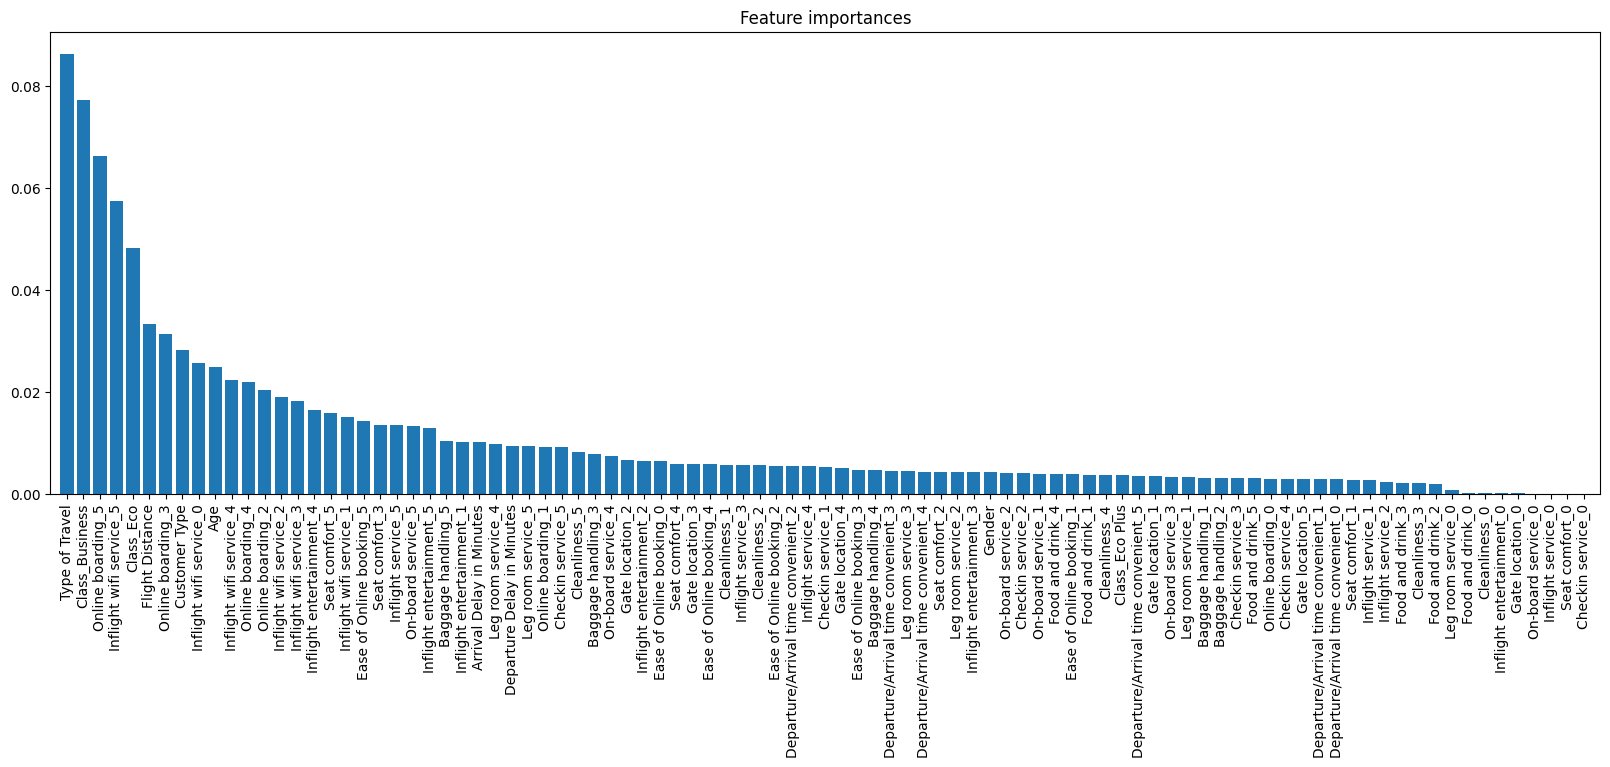

In [ ]:
# Huấn luyện mô hình RandomForestClassifier
rf.fit(X_train, y_train)

# Trích xuất độ quan trọng của đặc trưng
feature_importances = rf.feature_importances_

# Sắp xếp các đặc trưng theo độ quan trọng
indices = np.argsort(feature_importances)[::-1]

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(20, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>AdaBoost</h1></div>

Let's train and run the AdaBoost algorithm:

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.0702576112412178
Error on the test sample:  0.07160042344336445


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>GBT</h1></div>

Train and run gradient boosting decision trees:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Tìm max_depth tốt nhất
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.8536644049853231
Max Depth = 4: Test Score = 0.8902843943987296
Max Depth = 5: Test Score = 0.9094365044993022
Max Depth = 6: Test Score = 0.9108801308887926
Max Depth = 7: Test Score = 0.9235840431163082
Max Depth = 8: Test Score = 0.9342187575188875
Max Depth = 9: Test Score = 0.9382127905298109
Max Depth = 10: Test Score = 0.9474038785428998
Max Depth = 11: Test Score = 0.9484144170155431
Max Depth = 12: Test Score = 0.9494249554881863
Max Depth = 13: Test Score = 0.9523122082671671
Max Depth = 14: Test Score = 0.9517828785910206
Max Depth = 15: Test Score = 0.9525046917857658
Max Depth = 16: Test Score = 0.9527934170636639
Max Depth = 17: Test Score = 0.9531302632212116
Max Depth = 18: Test Score = 0.9523603291468168
Max Depth = 19: Test Score = 0.9528415379433136
Best Max Depth = 17: Best Test Score = 0.9531302632212116


In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print('Training sample error: ', err_train)
print('Error on the test sample: ', err_test)

Training sample error:  0.05446146072687463
Error on the test sample:  0.054472835763437755


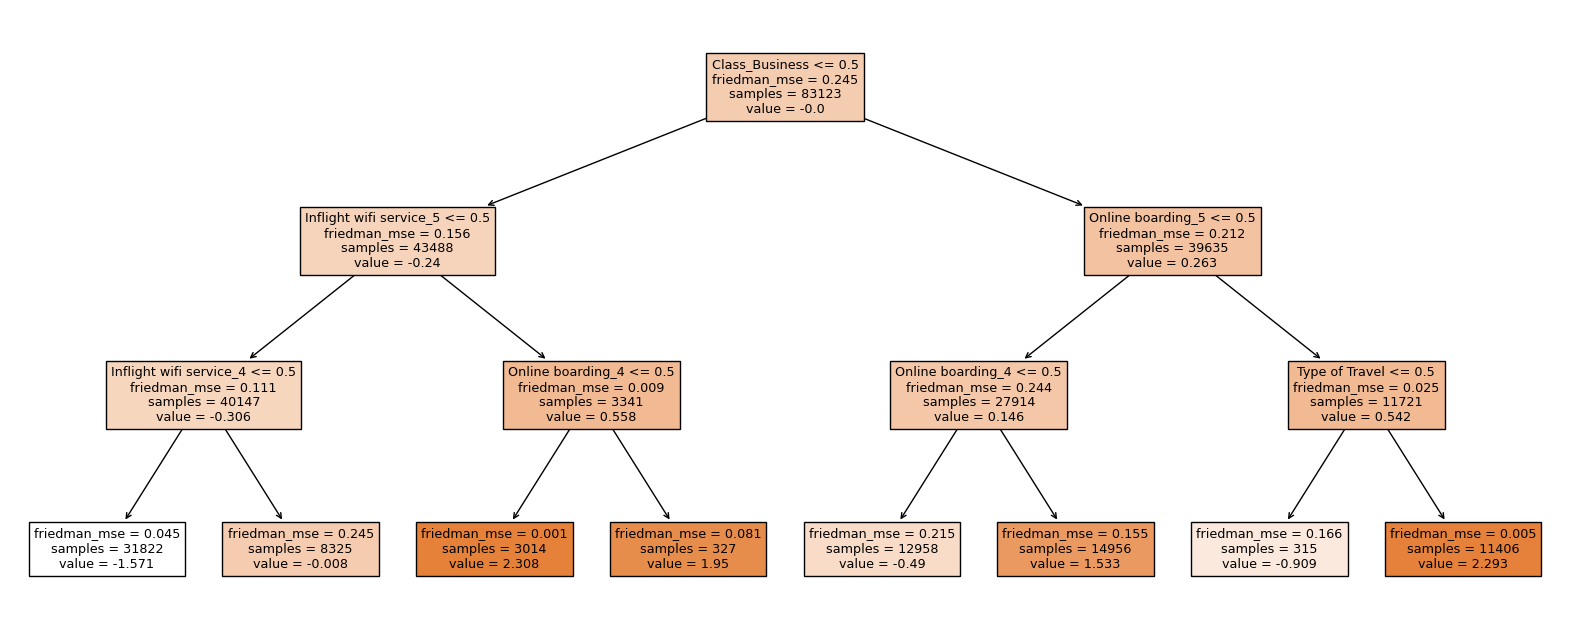

In [ ]:

# Assuming you've already trained a GradientBoostingClassifier named gbt
# Access a particular tree from the ensemble, let's say the first tree (index 0)
tree = gbt.estimators_[0, 0]  # Accessing the first tree in the first stage

# Visualize the particular tree
plt.figure(figsize=(20, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=["Class 0", "Class 1"])
plt.show()


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #52ab98; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1>General conclusions</h1></div>

***
**Kết luận về mẫu được xem xét:**

Mẫu ít nhiều cân bằng (56,7% trên 43,3%).
Số lượng nam và nữ trong mẫu này gần như nhau.
Phần lớn khách hàng của hãng hàng không này là khách hàng thường xuyên.

Hầu hết khách hàng của chúng tôi bay vì lý do công việc hơn là vì lý do cá nhân.

Khoảng một nửa số hành khách ngồi ở hạng thương gia.
Hơn 60% hành khách hài lòng với dịch vụ vận chuyển hành lý (đánh giá 4-5/5).

Hơn 50% hành khách cảm thấy thoải mái khi ngồi vào chỗ ngồi của mình (được đánh giá 4-5/5).

Có mối tương quan chặt chẽ (96%) giữa các tính năng 'Độ trễ khởi hành tính bằng phút' và 'Độ trễ đến tính bằng phút' (điều này khá logic và đã được thảo luận chi tiết ở trên).

Hầu hết khách hàng thường xuyên của hãng đều ở độ tuổi từ 30 đến 50 (trung bình trên 40 một chút). Độ tuổi của khách hàng không thường xuyên nhỏ hơn một chút (từ 25 đến 40 tuổi, trung bình dưới 30 một chút).

Những khách hàng có quãng đường bay dài thường chọn bay hạng thương gia.
Hành khách đi máy bay càng đi xa (tương ứng, họ ở trên chuyến bay càng lâu), họ càng hài lòng với giải trí trên chuyến bay và chỗ để chân rộng hơn (trung bình).

Hầu hết hành khách bay ở Hạng Phổ thông hoặc Hạng Phổ thông đều không hài lòng với chuyến bay, còn những hành khách may mắn bay ở Hạng Thương gia cũng hài lòng.

Hầu hết hành khách đánh giá dịch vụ wifi 5/5 đều hài lòng với chuyến bay.
Phần lớn hành khách đánh giá độ thoải mái của ghế ngồi và chỗ để chân rộng rãi ở mức 4 và 5 trên 5 đều hài lòng với chuyến bay.

***

# Kết luận về kết quả phân loại:

Đối với phương pháp KNN, lỗi trên tập huấn luyện là 5,2%và trên bộ kiểm tra là 6,5%.

Đối với máy vector hỗ trợ, lỗi trên cả bộ đào tạo và thử nghiệm là 5%.

Đối với rừng ngẫu nhiên và phân loại rừng cực kỳ ngẫu nhiên, lỗi trên bộ huấn luyện không được quan sát, nhưng trên bộ thử nghiệm, nó là 3,9%.

Đối với thuật toán ADABOOST, lỗi trên tập huấn luyện là 7%và trên bộ kiểm tra là 7,2%.

Đối với gradient được tăng cường các cây quyết định, lỗi trong các mẫu đào tạo và thử nghiệm lần lượt là 5,5% và 5,6%.
Các phân loại rừng ngẫu nhiên và cực kỳ ngẫu nhiên cho thấy kết quả tốt nhất (lỗi trên mẫu thử là 3,9%).